<a href="https://colab.research.google.com/github/pmoses222/webscrape/blob/master/Staff_promotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
staff1=pd.read_csv('train.csv')

In [0]:
staff2=pd.read_csv('test.csv')

In [0]:
staff1.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


# Filling the missing and corrupted infomation

In [0]:
staff1['Qualification'].fillna('Non-University Education',inplace=True)

In [0]:
staff2['Qualification'].fillna('Non-University Education',inplace=True)

In [0]:
staff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [0]:
staff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          16496 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

# Division

In [0]:
staff1['Division'].unique()

array(['Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information and Strategy',
       'Information Technology and Solution Support',
       'Sourcing and Purchasing', 'Business Finance Operations',
       'People/HR Management', 'Research and Innovation',
       'Regulatory and Legal services'], dtype=object)

In [0]:
position={'Commercial Sales and Marketing':1,
       'Customer Support and Field Operations':2,
       'Information and Strategy':3,
       'Information Technology and Solution Support':4,
       'Sourcing and Purchasing':5, 'Business Finance Operations':6,
       'People/HR Management':7, 'Research and Innovation':8,
       'Regulatory and Legal services':9}

In [0]:
position

{'Commercial Sales and Marketing': 1,
 'Customer Support and Field Operations': 2,
 'Information and Strategy': 3,
 'Information Technology and Solution Support': 4,
 'Sourcing and Purchasing': 5,
 'Business Finance Operations': 6,
 'People/HR Management': 7,
 'Research and Innovation': 8,
 'Regulatory and Legal services': 9}

# Qualification

In [0]:
staff1['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND',
       'Non-University Education'], dtype=object)

In [0]:
education={'MSc, MBA and PhD':3, 'First Degree or HND':2,
       'Non-University Education':1}

In [0]:
staff1['Qualification']=staff1['Qualification'].map(education)
staff2['Qualification']=staff2['Qualification'].map(education)

In [0]:
staff1.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,3,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,2,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,2,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,2,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,2,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [0]:
staff2.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,2,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,1,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,3,Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,2,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,2,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


# Gender

In [0]:
gender={'Female':1, 'Male':2}

In [0]:
staff1['Sex']=staff1['Gender'].map(gender)
staff2['Sex']=staff2['Gender'].map(gender)

# Channel of Recruitment

In [0]:
staff1['Channel_of_Recruitment'].unique()

array(['Direct Internal process', 'Agency and others',
       'Referral and Special candidates'], dtype=object)

In [0]:
channel={'Direct Internal process':1,'Agency and others':2,
       'Referral and Special candidates':3}

In [0]:
staff1['Channel']=staff1['Channel_of_Recruitment'].map(channel)
staff2['Channel']=staff2['Channel_of_Recruitment'].map(channel)

# Year of recruitment

In [0]:
staff2['Year_of_recruitment'].unique()

array([2017, 2018, 2012, 2009, 2014, 2011, 2015, 2013, 2016, 1993, 2007,
       2010, 2008, 1996, 2005, 2006, 1997, 1991, 2004, 1995, 2000, 2003,
       1999, 2002, 1998, 1989, 2001, 1990, 1992, 1994, 1988, 1986, 1987],
      dtype=int64)

# Foreign Schooled

In [0]:
foreign={'Yes':1, 'No':0}

In [0]:
staff1['F_schooled']=staff1['Foreign_schooled'].map(foreign)
staff2['F_schooled']=staff2['Foreign_schooled'].map(foreign)

# Marital Status

In [0]:
status={'Married':2,'Single':1,'Not_Sure':0}

In [0]:
staff1['Status']=staff1['Marital_Status'].map(status)
staff2['Status']=staff2['Marital_Status'].map(status)

In [0]:
staff1.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Sex,Channel,F_schooled,Status
0,YAK/S/00001,Commercial Sales and Marketing,3,Female,Direct Internal process,2,1986,12.5,2011,1,...,No,Married,No,No,0,0,1,1,0,2
1,YAK/S/00002,Customer Support and Field Operations,2,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,Married,No,No,0,0,2,2,1,2
2,YAK/S/00003,Commercial Sales and Marketing,2,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,Married,No,No,0,0,2,1,1,2
3,YAK/S/00004,Commercial Sales and Marketing,2,Male,Agency and others,3,1982,2.5,2009,0,...,Yes,Single,No,No,1,0,2,2,1,1
4,YAK/S/00006,Information and Strategy,2,Male,Direct Internal process,3,1990,7.5,2012,0,...,Yes,Married,No,No,1,0,2,1,1,2


# Past_Disciplinary_Action

In [0]:
disipline={'Yes': 1,'No':0}

In [0]:
staff1['Past_d_action']=staff1['Past_Disciplinary_Action'].map(disipline)
staff2['Past_d_action']=staff2['Past_Disciplinary_Action'].map(disipline)

In [0]:
staff1.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Sex,Channel,F_schooled,Status,Past_d_action
0,YAK/S/00001,Commercial Sales and Marketing,3,Female,Direct Internal process,2,1986,12.5,2011,1,...,Married,No,No,0,0,1,1,0,2,0
1,YAK/S/00002,Customer Support and Field Operations,2,Male,Agency and others,2,1991,12.5,2015,0,...,Married,No,No,0,0,2,2,1,2,0
2,YAK/S/00003,Commercial Sales and Marketing,2,Male,Direct Internal process,2,1987,7.5,2012,0,...,Married,No,No,0,0,2,1,1,2,0
3,YAK/S/00004,Commercial Sales and Marketing,2,Male,Agency and others,3,1982,2.5,2009,0,...,Single,No,No,1,0,2,2,1,1,0
4,YAK/S/00006,Information and Strategy,2,Male,Direct Internal process,3,1990,7.5,2012,0,...,Married,No,No,1,0,2,1,1,2,0


# Drop irrelevant features

In [0]:
staff1.drop(['EmployeeNo','Division','Gender','Channel_of_Recruitment','Year_of_birth',
             'Year_of_recruitment','Marital_Status','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement'],axis=1,inplace=True)

staff2.drop(['EmployeeNo','Division','Gender','Channel_of_Recruitment','Year_of_birth',
             'Year_of_recruitment','Marital_Status','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement'],axis=1,inplace=True)

In [0]:
staff1.drop(['State_Of_Origin','Foreign_schooled'],axis=1,inplace=True)
staff2.drop(['State_Of_Origin','Foreign_schooled'],axis=1,inplace=True)

# Exploratory Data Analysis

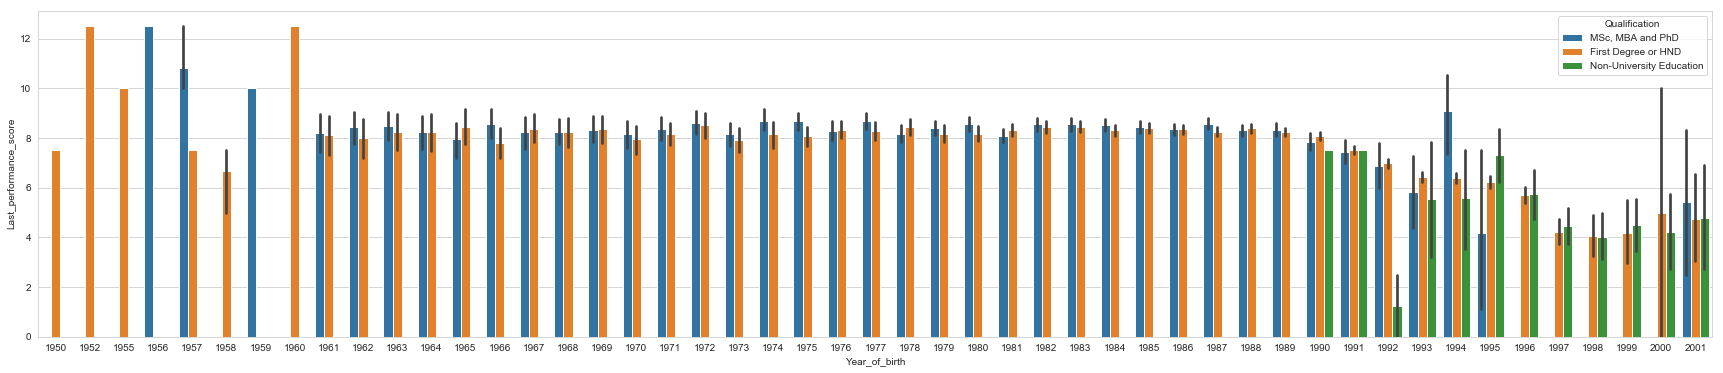

In [0]:
plt.figure(figsize=(30,6))
sns.barplot(x='Year_of_birth',y='Last_performance_score',data=train_data,hue='Qualification')

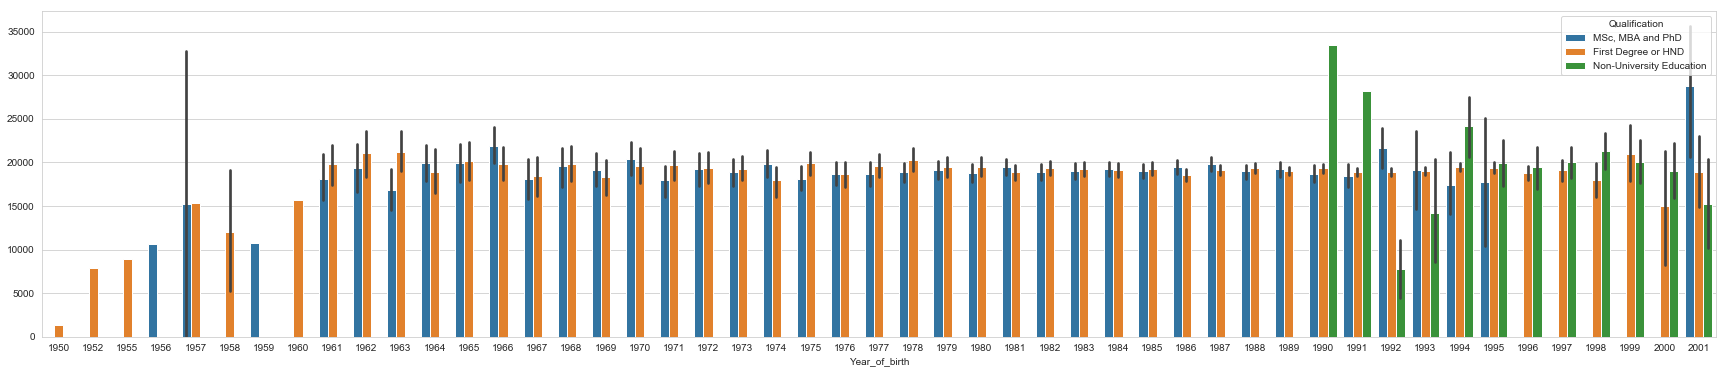

In [0]:
plt.figure(figsize=(30,6))
sns.barplot(x='Year_of_birth',y=np.arange(0,38312),data=train_data,hue='Qualification')

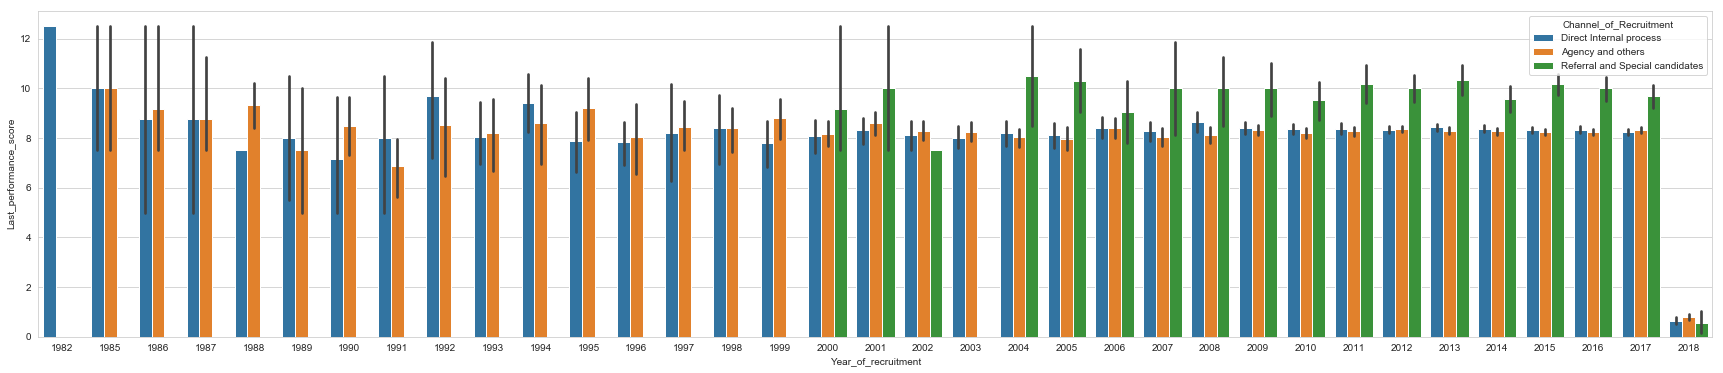

In [0]:
plt.figure(figsize=(30,6))
sns.barplot(x='Year_of_recruitment',y='Last_performance_score',data=train_data,hue='Channel_of_Recruitment')

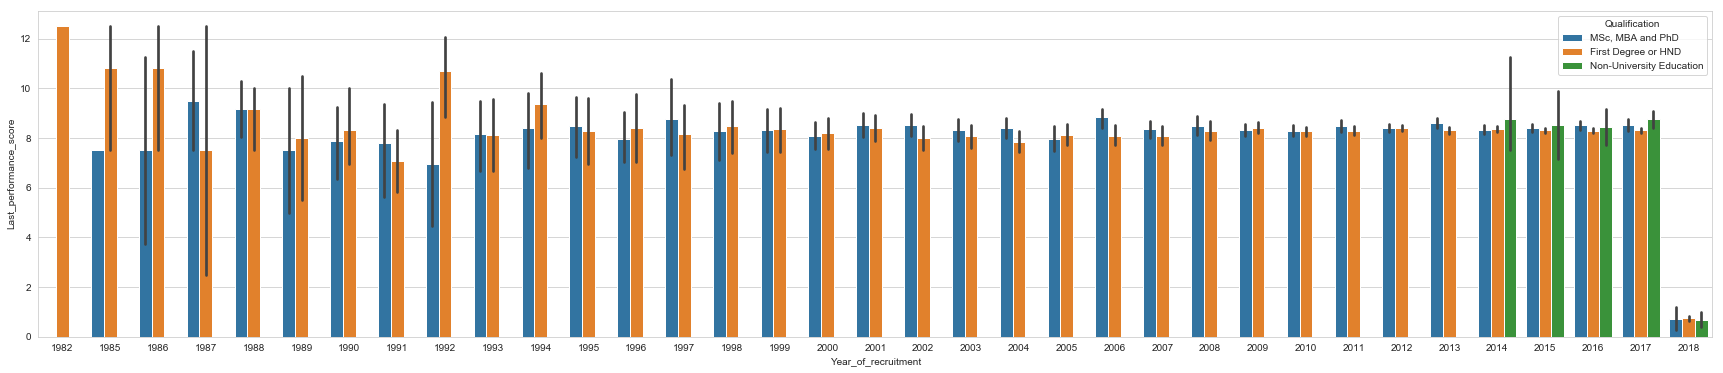

In [0]:
plt.figure(figsize=(30,6))
sns.barplot(x='Year_of_recruitment',y='Last_performance_score',data=train_data,hue='Qualification')

# Model Creation and Validation

In [0]:
X=train_data[['Gender_1','Trainings_Attended','Last_performance_score',
       'Targets_met','Training_score_average','Foreign_schooled_1',
       'Marital_Status_1','Previous_IntraDepartmental_Movement_1',
       ]]

In [0]:
y=train_data['Promoted_or_Not']

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [0]:
model1=KNeighborsClassifier(n_neighbors=195)
scoring='accuracy'
score=cross_val_score(model1,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.92745303 0.91962422 0.91777604 0.91803707 0.92926129 0.93108849
 0.92430175 0.92090838 0.92169146 0.92116941]


In [0]:
round(np.mean(score)*100,2)

92.31

In [0]:
model2=DecisionTreeClassifier()
scoring='accuracy'
score2=cross_val_score(model2,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score2)

[0.91283925 0.91153445 0.91020621 0.90968416 0.91490472 0.91986427
 0.91307753 0.91125033 0.91333855 0.91203341]


In [0]:
round(np.mean(score2)*100,2)

91.29

In [0]:
model3=RandomForestClassifier(n_estimators=20)
scoring='accuracy'
score3=cross_val_score(model3,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score3)

[0.91570981 0.91257829 0.90707387 0.90681284 0.91751501 0.91908118
 0.9109893  0.91046724 0.91333855 0.91072827]


In [0]:
round(np.mean(score3)*100,2)

91.24

In [0]:
model4=GaussianNB()
scoring='accuracy'
score4=cross_val_score(model4,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score4)

[0.91675365 0.90996868 0.91255547 0.90785696 0.92090838 0.92012529
 0.91594884 0.91490472 0.91516575 0.91020621]


In [0]:
round(np.mean(score4)*100,2)

91.44

In [0]:
model5=XGBClassifier()
scoring='accuracy'
score5=cross_val_score(model6,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score5)

[0.92771399 0.92197286 0.91934221 0.91882015 0.93004437 0.93161055
 0.92560689 0.92195249 0.92325764 0.92143044]


In [0]:
round(np.mean(score5)*100,2)

92.42

In [0]:
model=LogisticRegression()

In [0]:
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predict=model.predict(test_data).astype(int)

In [0]:
model.score(X,y)

0.915587805387346

# Extract back to csv file

In [0]:
staff1.to_csv('staff_train.csv')
staff2.to_csv('staff_test.csv')